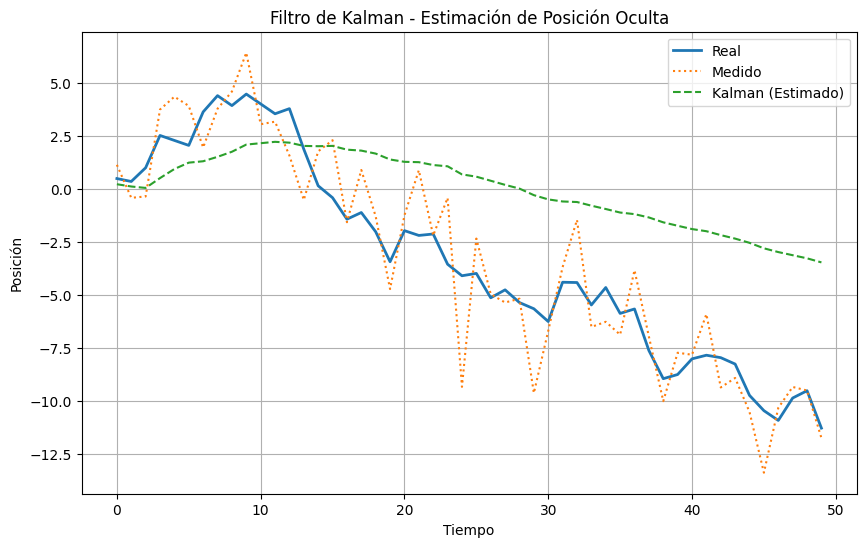

Error cuadrático medio (RMSE): 4.6003


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error

# Semilla para reproducibilidad
np.random.seed(42)

# Generar datos reales (posición) y observaciones ruidosas
n = 50
real = np.cumsum(np.random.randn(n))            # Movimiento aleatorio
noise = np.random.normal(0, 2, size=n)           # Ruido gaussiano
observed = real + noise                          # Medición con ruido

# Guardar los datos en CSV
df = pd.DataFrame({'real': real, 'observed': observed})
df.to_csv('datos.csv', index=False)

# Inicialización del filtro
x_hat = 0               # Estimación inicial
P = 1                   # Varianza inicial
Q = 0.001               # Varianza del proceso
R = 4                   # Varianza de medición
estimate = []           # Lista para guardar estimaciones

# Filtro de Kalman
for z in observed:
    # Predicción
    x_hat_prior = x_hat
    P_prior = P + Q

    # Corrección
    K = P_prior / (P_prior + R)
    x_hat = x_hat_prior + K * (z - x_hat_prior)
    P = (1 - K) * P_prior

    estimate.append(x_hat)

# Visualización
plt.figure(figsize=(10, 6))
plt.plot(real, label='Real', linewidth=2)
plt.plot(observed, label='Medido', linestyle='dotted')
plt.plot(estimate, label='Kalman (Estimado)', linestyle='--')
plt.title('Filtro de Kalman - Estimación de Posición Oculta')
plt.xlabel('Tiempo')
plt.ylabel('Posición')
plt.legend()
plt.grid(True)
plt.savefig('grafico_resultado.png')
plt.show()

# Cálculo de error
rmse = np.sqrt(mean_squared_error(real, estimate))
print(f"Error cuadrático medio (RMSE): {rmse:.4f}")
